In [2]:
#Installing the necessary libraries
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q https://bitbucket.org/habedi/datasets/raw/b6769c4664e7ff68b001e2f43bc517888cbe3642/spark/spark-3.0.2-bin-hadoop2.7.tgz
!tar xf spark-3.0.2-bin-hadoop2.7.tgz
!rm -rf spark-3.0.2-bin-hadoop2.7.tgz*
!pip -q install findspark pyspark graphframes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 15.3 MB/s eta 0:00:00


In [3]:
#Initializing the environment
import os
os.environ["PYSPARK_DRIVER_PYTHON"] = "jupyter"
os.environ["PYSPARK_DRIVER_PYTHON_OPTS"] = "notebook"
os.environ["PYSPARK_SUBMIT_ARGS"] = "--packages graphframes:graphframes:0.8.1-spark3.0-s_2.12 pyspark-shell"

In [4]:
from graphframes import *
from pyspark import *
from pyspark.sql import *
spark = SparkSession.builder.appName('myfunction').getOrCreate()

In [5]:
vertices = spark.read.option('header', 'true').csv('Nodes.csv')
edges = spark.read.option('header', 'true').csv('Edges.csv')

In [6]:
#Displaying the vertices and edges
vertices.show()
edges.show()

+---+-----------+----------+--------+---------+----+---+
| id|incident_id|     state|n_killed|n_injured|year|day|
+---+-----------+----------+--------+---------+----+---+
|  1|     480358|California|       4|        3|2013| 19|
|  2|     108649|California|       4|        2|2014| 20|
|  3|     133455|California|       4|        0|2014|  9|
|  4|     138282|California|       4|        8|2014| 23|
|  5|     139689|California|       4|        0|2014| 26|
|  6|     272531|California|       4|        0|2015|  1|
|  7|     276459|California|       4|        0|2015|  9|
|  8|     476338|California|       4|        0|2015| 31|
|  9|     676663|California|       4|       11|2016| 15|
| 10|     789126|California|       4|        0|2017|  5|
| 11|     866933|California|       4|        2|2017| 14|
| 12|     919715|California|       4|        0|2017| 23|
| 13|    1020918|California|       4|        0|2018|  5|
| 14|    1022973|California|       4|        0|2018|  7|
| 15|    1065908|California|   

In [7]:
#Creating a graph of vertices and edges
mygraph = GraphFrame(vertices, edges)

/usr/local/lib/python3.10/dist-packages/pyspark/sql/dataframe.py:168: UserWarning: DataFrame.sql_ctx is an internal property, and will be removed in future releases. Use DataFrame.sparkSession instead.
  warnings.warn(


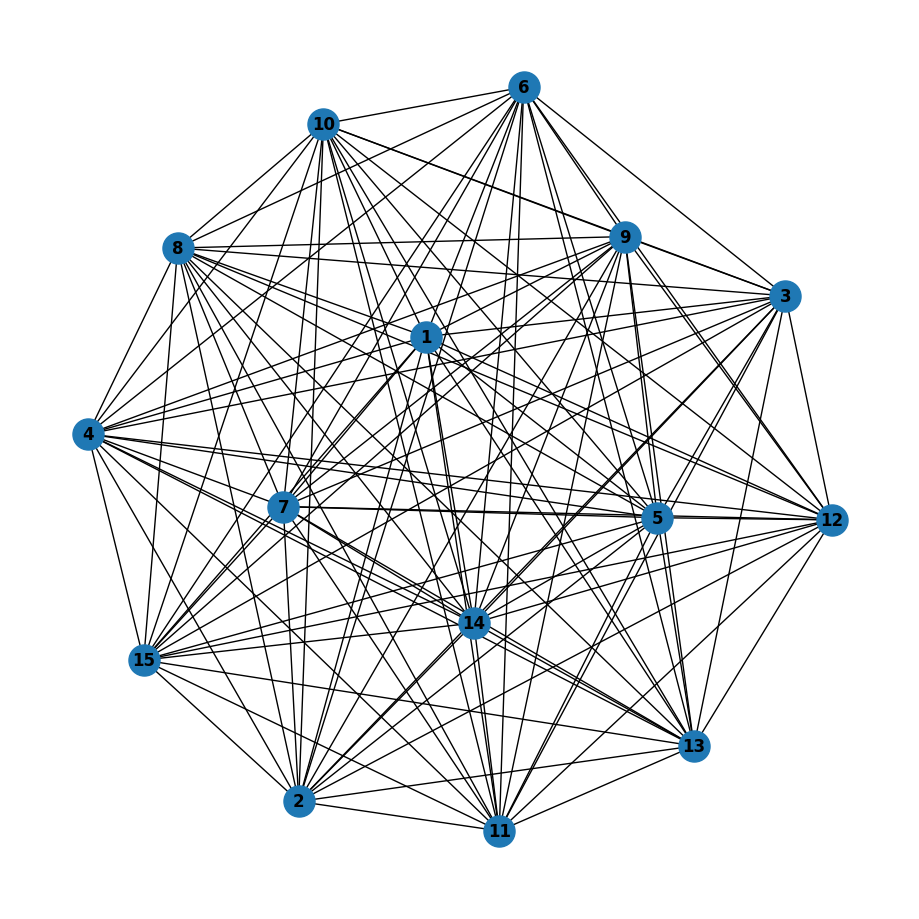

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
# the function will plot the source and destination nodes and connect them by meand of undirected line
def plot_undirected_graph(edge_list):
    plt.figure(figsize=(9,9))
    gplot=nx.Graph()
    for row in edge_list.select("src", "dst").take(1000):
        gplot.add_edge(row["src"], row["dst"])
    nx.draw(gplot, with_labels=True, font_weight="bold", node_size=500)
plot_undirected_graph(mygraph.edges)

In [11]:
#Displaying the users and number of out degress
mygraph.outDegrees.show()

#Displaying top-5 users having maximum outDegrees
mygraph.outDegrees.orderBy(['outDegree'], ascending = [False]).show(5)

#Displaying bottom-3 users having minimum outDegrees
mygraph.outDegrees.orderBy(['outDegree'], ascending = [True]).show(5)

+---+---------+
| id|outDegree|
+---+---------+
|  7|        8|
| 11|        4|
|  3|       12|
|  8|        7|
|  5|       10|
|  6|        9|
|  9|        6|
|  1|       14|
| 10|        5|
|  4|       11|
| 12|        3|
| 13|        2|
| 14|        1|
|  2|       13|
+---+---------+

+---+---------+
| id|outDegree|
+---+---------+
|  1|       14|
|  2|       13|
|  3|       12|
|  4|       11|
|  5|       10|
+---+---------+
only showing top 5 rows

+---+---------+
| id|outDegree|
+---+---------+
| 14|        1|
| 13|        2|
| 12|        3|
| 11|        4|
| 10|        5|
+---+---------+
only showing top 5 rows



In [12]:
#Displaying the users and number of in degress
mygraph.inDegrees.show()

#Displaying top-5 users having maximum in Degrees
mygraph.inDegrees.orderBy(['inDegree'], ascending = [False]).show(5)

#Displaying bottom-3 users having minimum in Degrees
mygraph.inDegrees.orderBy(['inDegree'], ascending = [True]).show(3)

+---+--------+
| id|inDegree|
+---+--------+
|  7|       6|
| 15|      14|
| 11|      10|
|  3|       2|
|  8|       7|
|  5|       4|
|  6|       5|
|  9|       8|
| 10|       9|
|  4|       3|
| 12|      11|
| 13|      12|
| 14|      13|
|  2|       1|
+---+--------+

+---+--------+
| id|inDegree|
+---+--------+
| 15|      14|
| 14|      13|
| 13|      12|
| 12|      11|
| 11|      10|
+---+--------+
only showing top 5 rows

+---+--------+
| id|inDegree|
+---+--------+
|  2|       1|
|  3|       2|
|  4|       3|
+---+--------+
only showing top 3 rows



In [13]:
x=mygraph.pageRank(maxIter=10)
x.vertices.show()

+---+-----------+----------+--------+---------+----+---+-------------------+
| id|incident_id|     state|n_killed|n_injured|year|day|           pagerank|
+---+-----------+----------+--------+---------+----+---+-------------------+
|  8|     476338|California|       4|        0|2015| 31| 0.6362916460750419|
|  4|     138282|California|       4|        8|2014| 23| 0.4496284811291728|
|  6|     272531|California|       4|        0|2015|  1|  0.525544162636187|
| 12|     919715|California|       4|        0|2017| 23| 1.1556724740112638|
| 11|     866933|California|       4|        2|2017| 14| 0.9531319351171426|
| 10|     789126|California|       4|        0|2017|  5| 0.8146426794897663|
|  5|     139689|California|       4|        0|2014| 26| 0.4843725001255179|
| 13|    1020918|California|       4|        0|2018|  5|  1.483113049215566|
| 14|    1022973|California|       4|        0|2018|  7| 2.1134366863153717|
|  3|     133455|California|       4|        0|2014|  9|0.41988651934241816|